In [1]:
# imports
import os
import random
import numpy as np
from sklearn.linear_model import LinearRegression  # for curve fit

# visualization - imports and setting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

# notebook formatting
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))


In [2]:
%%html
<style>
table {float:left}
</style>

In [ ]:
# fix RISE scollbar missing
from traitlets.config.manager import BaseJSONConfigManager
path = "C:\\Users\\chris\\.jupyter\\nbconfig"
cm = BaseJSONConfigManager(config_dir=path)

cm.update("livereveal", {
              "scroll": True,
})

# also check jupyter Cell menu/Toggle Scrolling

In [3]:
import matplotlib.pyplot as plt
print(plt.get_backend())

# swap to terminal to show separate renderer

module://ipykernel.pylab.backend_inline


# Python
There should be one-- and preferably only one --obvious way to do it.n - 
<br><br>
# Matplotlib
"When viewing this documentation and examples, you will find different coding styles and usage patterns. These styles are perfectly valid and have their pros and cons.""

# Matplotlib - background

- "grandparent of python visualization packages"
- very powerful - and very complex
<br><br>
- has several different APIs<br>
  -- object oriented API (e.g. fig, ax)  **--> core, recommended if customization needed<br>**
  -- pyplot API (e.g. plt) **--> simpler, less flexible**<br>
  -- pylab API **--> do NOT use, imports numpy into global  namespace)**<br><br>
- mature / grown organically since 2003
- documentation is outdated
- stackoverflow / web examples vary widely in style
- "sometimes difficult"
<br><br>

- [matplotlib home page](https://matplotlib.org/)
- **you need to know how to work with it**

# Matplotlib - key terms 
<br><br>
["Matplotlib usage page"](https://matplotlib.org/faq/usage_faq.html)
<br><br>
<img src="./images/matplotlib_anatomy1.webp" alt="Matplotlib - Parts of a Figure" title="Matplotlib - Parts of a Figure" />

[there are two usage patterns for matplotlib - pyplot and object oriented api](https://matplotlib.org/api/index.html#usage-patterns)

### code an example with each pattern in a table, and display the graphs

<table> <tr> <th style="width:400px"></th> <th></th> </tr> 
    <tr> 
        <td><img src="./images/matplotlib_anatomy1.webp" alt="Matplotlib - Parts of a Figure" title="Matplotlib - Parts of a Figure"/></td>
        <td style="text-align:left;vertical-align:top"><br><br><strong><i>- Figure - </i></strong>the entire drawing object, which contains one or more plots (confusingly callex `axes`).<br><br> 
            <strong><i>- Axes - </i></strong>what you normally think of as "a plot" (aka `sub-plots`)<br><br>
            <strong><i>- Axis - </i></strong>the horizontal and vertical axis lines (e.g. X and Y) on a subplot<br><br>
            <strong><i>- Artist - </i></strong>everything you can see in a figure is an `artist` object<br><br> </td> 
    </tr>
    <tr>
        <td></td>
        <td></td>
    </tr>
    <tr>
        <td></td>
        <td style="text-align:left"></td>
    </tr>
    <tr>
        <td></td>
        <td style="text-align:left"></td>
    </tr>
</table>

<Figure size 432x288 with 0 Axes>

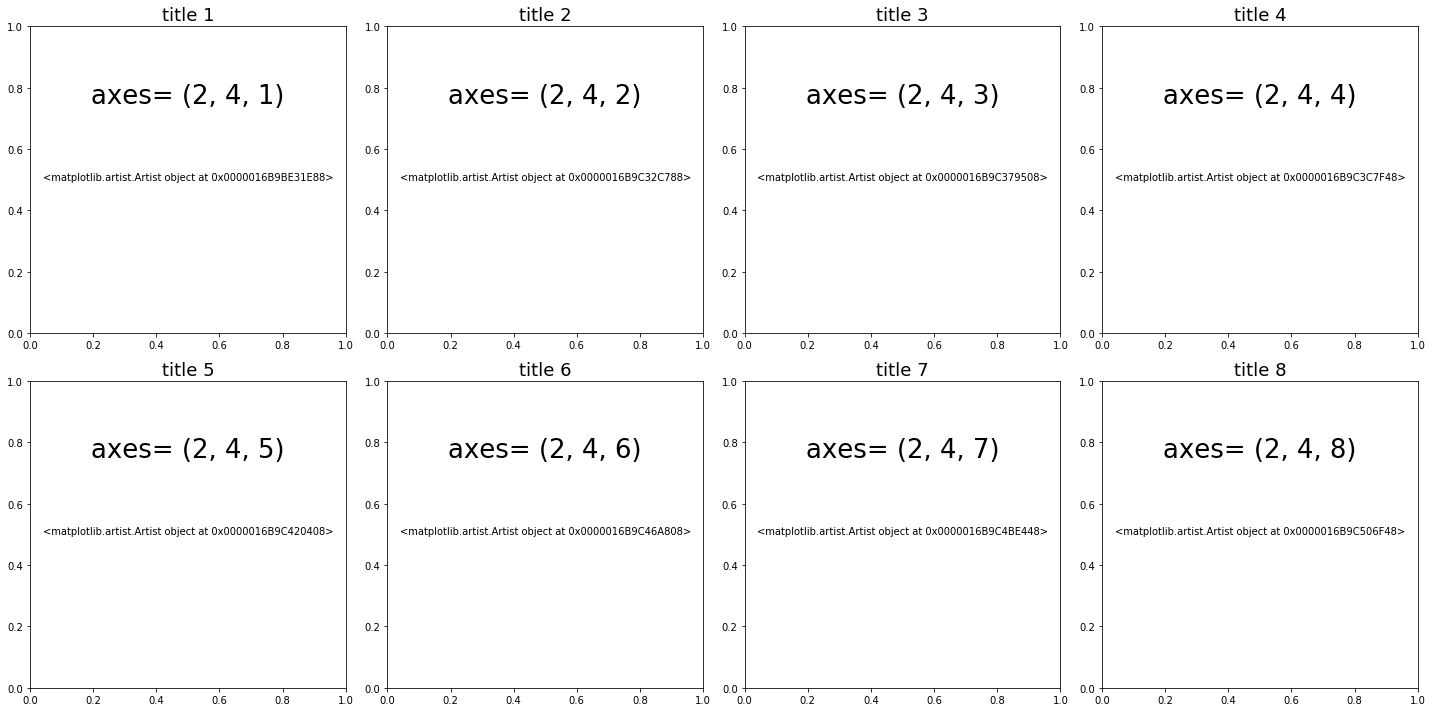

In [4]:
# pyplot - keeps track of the current figure, applies changes to that object
fig = plt.figure()
fig.suptitle('No axes on this figure')
fig, ax_list = plt.subplots(2,4, figsize=(20,10))

for i in range (1, 9):
    plt.subplot(2, 4, i)
    plt.title(f"title {i}", fontsize=18)
    plt.text(0.5, 0.75, f"axes= (2, 4, {i})", ha="center", fontsize = 26)
    plt.text(0.5, 0.5, str(plt.Artist()), ha="center", fontsize = 10)
    plt.tight_layout()


Text(0, 0.5, 'axes 3 -Y')

<Figure size 432x288 with 0 Axes>

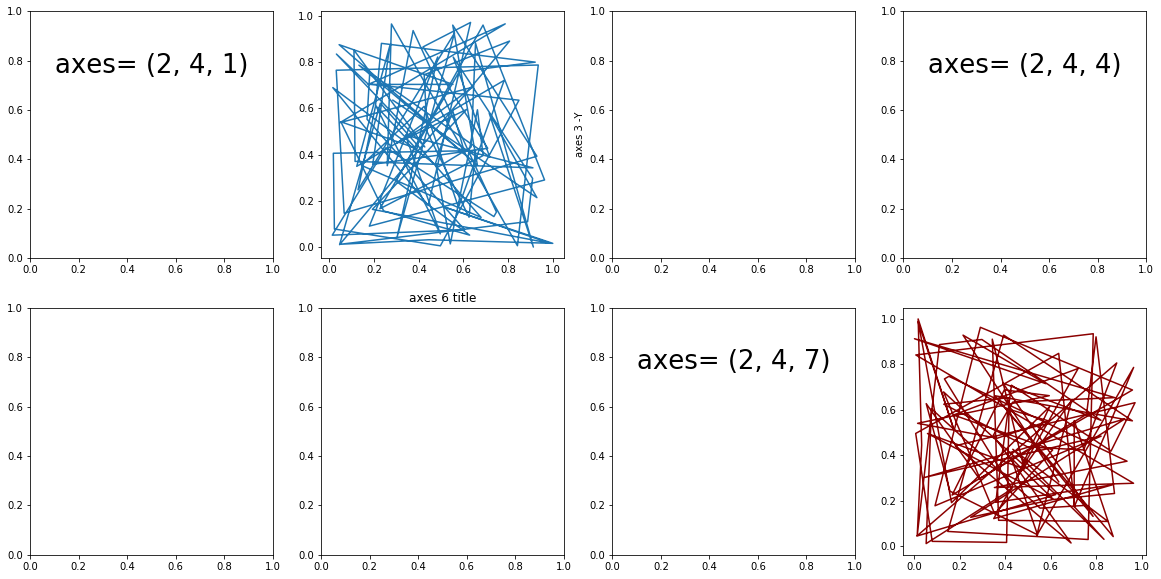

In [5]:
# object oriented API - each object is explictly managed
fig2 = plt.figure()
fig2.suptitle('No axes on this figure')

# list axes objects, in order you want them to appear - must match size of plt.subplots
fig2, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2,4, figsize=(20,10))

# add arbitrary labels
ax1.text(0.5, 0.75, f"axes= (2, 4, 1)", ha="center", fontsize = 26)
ax4.text(0.5, 0.75, f"axes= (2, 4, 4)", ha="center", fontsize = 26)
ax7.text(0.5, 0.75, f"axes= (2, 4, 7)", ha="center", fontsize = 26)

# create random data
data1, data2, data3, data4 = np.random.rand(4, 100)

ax2.plot(data1, data2)
ax8.plot(data2, data1, color="darkred")

ax6.title.set_text("axes 6 title")
ax3.set_ylabel("axes 3 -Y")



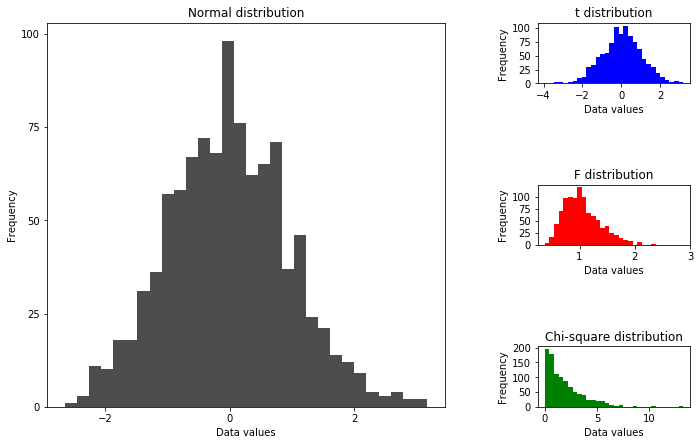

In [6]:
# use matplotlib to create subplots of different sizes

import matplotlib.gridspec as gridspec

# Generate data
dist_norm = np.random.normal(loc=0, scale=1, size=1000)
dist_tdis = np.random.standard_t(df=29, size=1000)
dist_fdis = np.random.f(dfnum=59, dfden=28, size=1000)
dist_chsq = np.random.chisquare(df=2, size=1000)

# Plot figure with subplots of different sizes
fig = plt.figure(1)
# set up subplot grid
gridspec.GridSpec(3,3)

# large subplot
plt.subplot2grid((3,3), (0,0), colspan=2, rowspan=3)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.title('Normal distribution')
plt.xlabel('Data values')
plt.ylabel('Frequency')
plt.hist(dist_norm, bins=30, color='0.30')

# small subplot 1
plt.subplot2grid((3,3), (0,2))
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.title('t distribution')
plt.xlabel('Data values')
plt.ylabel('Frequency')
plt.hist(dist_tdis, bins=30, color='b')

# small subplot 2
plt.subplot2grid((3,3), (1,2))
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.title('F distribution')
plt.xlabel('Data values')
plt.ylabel('Frequency')
plt.hist(dist_fdis, bins=30, color='r')

# small subplot 3
plt.subplot2grid((3,3), (2,2))
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.title('Chi-square distribution')
plt.xlabel('Data values')
plt.ylabel('Frequency')
plt.hist(dist_chsq, bins=30, color='g')

# fit subplots and save fig
fig.tight_layout()
fig.set_size_inches(w=11,h=7)
# fig_name = 'plot.png'
# fig.savefig(fig_name)

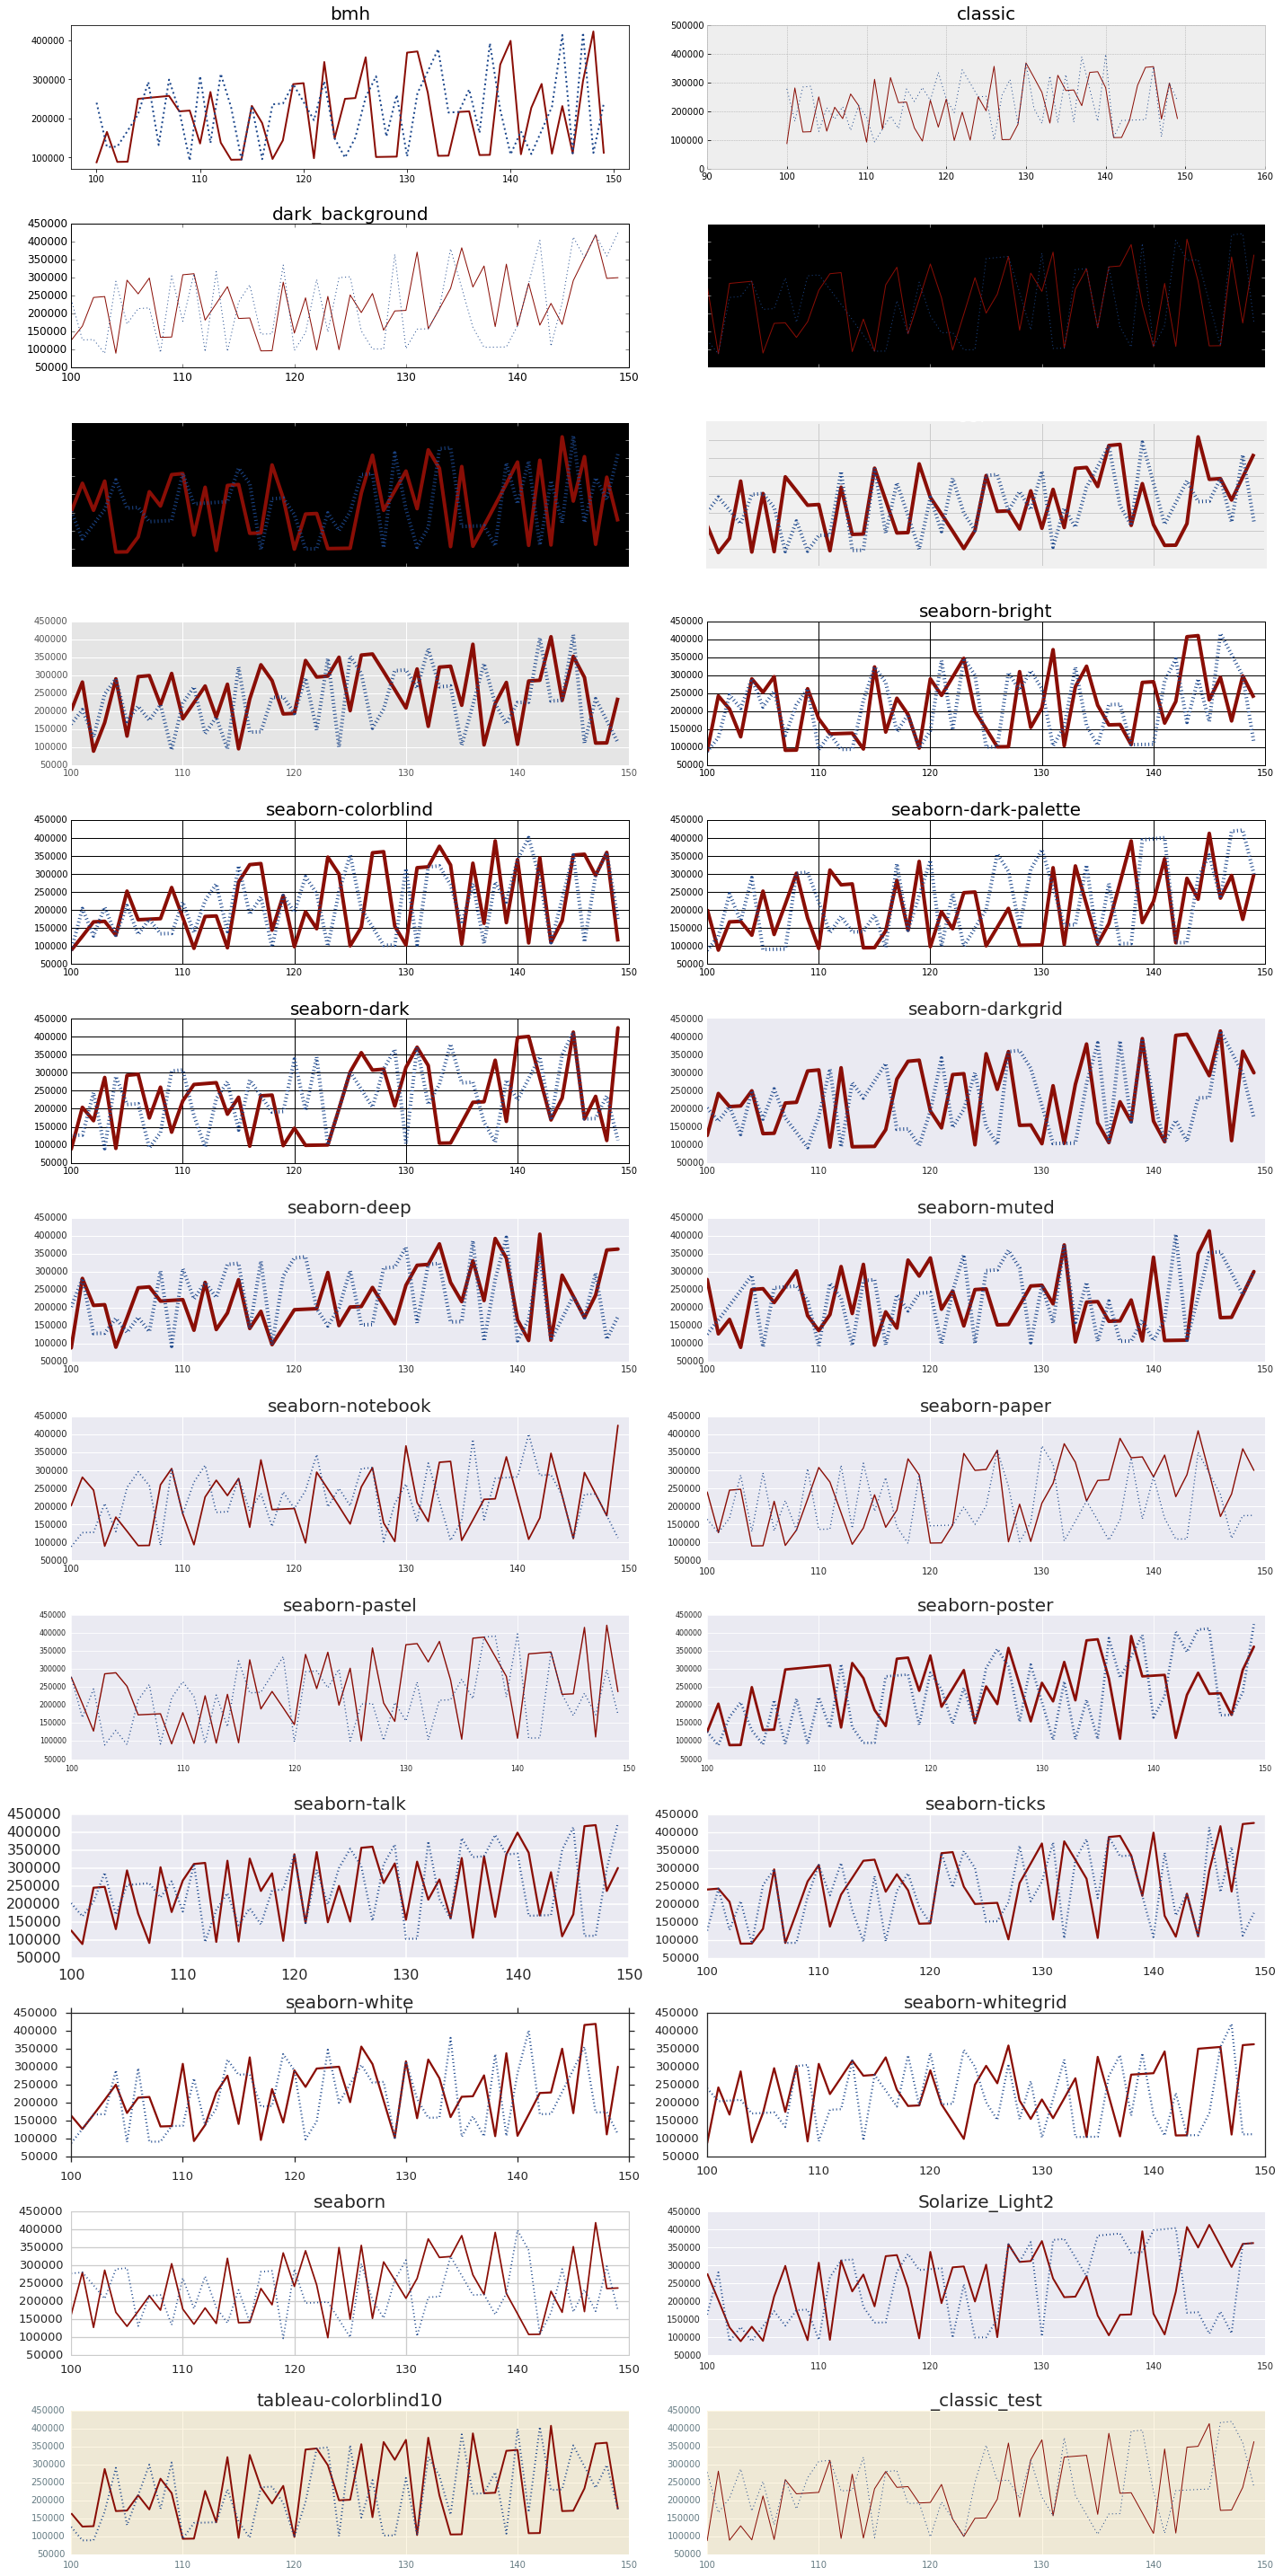

In [7]:
# matplot lib has some basic styles that are helpful

def plot_different_styles(style):
    style=str(style)
    plt.style.use(style)
    
    # create random data
    x_data = [x for x in range(100, 150)]
    y_data_01 = [int(50000*(1+(random.randint(1, 6)/100)*(x-24))) for x in range(100, 150)]
    y_data_02 = [int(50000*(1+(random.randint(1, 6)/100)*(x-24))) for x in range(100, 150)]

    plt.plot(x_data, y_data_01, linestyle="-", color="#8a0e06")
    plt.plot(x_data, y_data_02, linestyle="dotted", color="#1c478c")
    return plt


fig4, ax_list = plt.subplots(13,2, figsize=(20,40))

for i, style in enumerate(plt.style.available):
    plt.subplot(13, 2, i+1)
    plt.title(str(style), fontsize=20)
    plot_different_styles(style)
    plt.tight_layout()


# Matplotlib - common challenges

- "sometimes difficult"
- unfortunate object naming (axes vs axis)
- multiple API
- core docs not current
- mixed / inconsistent examples

# Matplotlib - simple ways to improve...


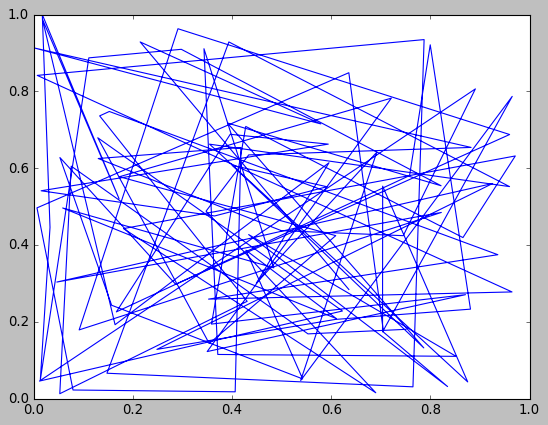

In [8]:
plt.plot(data2, data1, color="blue")

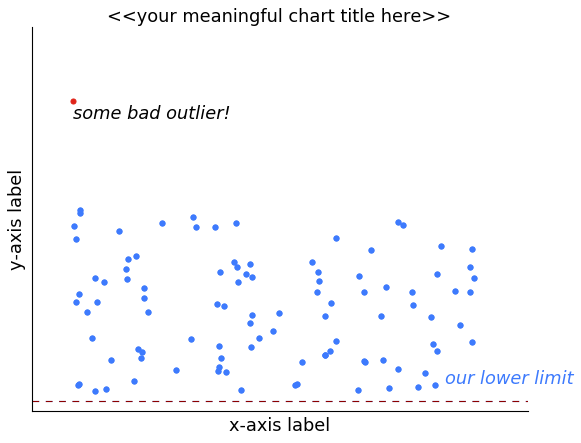

In [9]:
# matplotlib simple improvements
# [Medium - simple ways to improve matplotlib -- pyplot](https://towardsdatascience.com/simple-ways-to-improve-your-matplotlib-b64eebccfd5) <br>
print("\n\n")
# clean up background color (called facecolor)
plt.figure(facecolor="white")

# meaningful simple labels
plt.title("<<your meaningful chart title here>>", fontsize=16)
plt.xlabel("x-axis label", fontsize=16)
plt.ylabel("y-axis label", fontsize=16)

# set good axis ranges
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 2)

# remove extraneous chart junk
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

# use xkcd color library
better_color='xkcd:lightish blue'

# layer graph objects
# using alpha=0.9
plt.scatter(data2, data1, color=better_color, alpha=0.9)

# highlight baselines with horizontal or vertical lines
plt.axhline(np.mean(data1)-.5, linestyle='--', color=better_color)
plt.text(0.9, .05, "our lower limit", fontsize=16, fontstyle="italic", color=better_color);

# ordering objects - 
# order scatter and line differently
plt.scatter(data2, data1, color=better_color, alpha=0.9, zorder=1)
plt.axhline(np.mean(data1)-.5, linestyle='--', color="darkred", zorder=2)

# annotate important points
plt.scatter(0, 1.6, color="#e02419")
plt.text(0, 1.5, "some bad outlier!", fontsize=16, fontstyle="italic");



# Matplotlib - you need to know basic usage

# resources

[Medium - Matplotlib Guide For People In A Hurry  -- pyplot ](https://towardsdatascience.com/all-your-matplotlib-questions-answered-420dd95cb4ff)  <br>

[Medium - simple ways to improve matplotlib -- pyplot](https://towardsdatascience.com/simple-ways-to-improve-your-matplotlib-b64eebccfd5) <br>

[matplotlib docs  -- mixed, both pyplot and OO API](https://matplotlib.org/) <br>

[matplotlib cheat sheet - DataCamp](https://datacamp-community-prod.s3.amazonaws.com/28b8210c-60cc-4f13-b0b4-5b4f2ad4790b)

# [link to next chapter - Bokeh](http://localhost:8888/notebooks/notebooks/02_bokeh_chapter.ipynb)